In [2]:
import numpy as np
import pandas as pd
import visuals as vs

from IPython.display import display

%matplotlib inline

## Loading the Dataset:

In [3]:
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

Printing the first few entries of the RMS Titanic dataset:

In [4]:
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Storing the 'Survived' feature in a new variable and removing it from the dataset:

In [5]:
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis=1)

Showing the new data:

In [6]:
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


## Survival Data Analysis:

In [12]:
analysis = full_data[['Survived', 'Pclass', 'Sex', 'Age', \
                 'SibSp', 'Parch', 'Fare', 'Embarked']]

### Average Values for Survival:

In [21]:
analysis.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


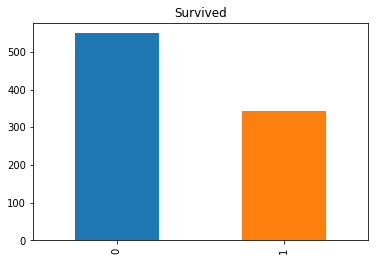

In [13]:
analysis['Survived'].value_counts().plot(kind = 'bar', \
                                         title = 'Survived')

### By Age:

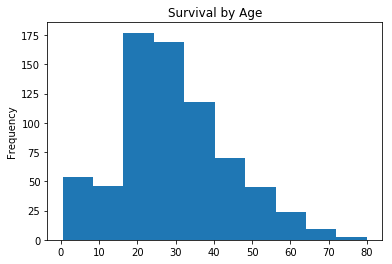

In [14]:
analysis['Age'].plot(kind = 'hist', title = 'Survival by Age')

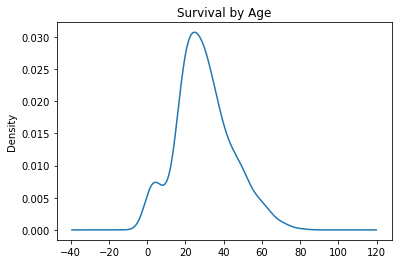

In [15]:
analysis['Age'].plot(kind = 'kde', title = 'Survival by Age')

### By Gender:

In [16]:
analysis['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

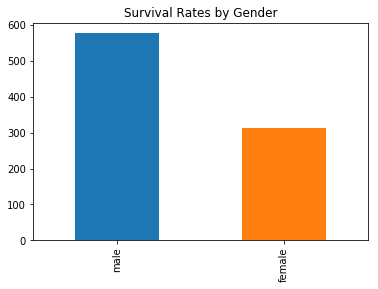

In [18]:
analysis['Sex'].value_counts().plot(kind = 'bar', \
                                    title = 'Survival Rates by Gender')

### By Class:

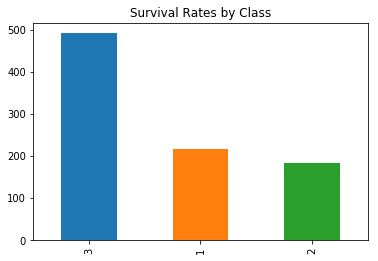

In [20]:
analysis['Pclass'].value_counts().plot(kind = 'bar', \
                                       title = 'Survival Rates by Class')

## Survival Predictions:

### Accuracy Score:


In [24]:
def accuracy_score(truth, pred):
    
    if len(truth) == len(pred):
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
        
    else:
        return "Number of predictions does not match the number of outcomes."
    
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


#### Prediction if Passenger is Female:

In [25]:
def predictions_1(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():
        predictions.append(1 if passenger['Sex'] == 'female' else 0)
        
    return pd.Series(predictions)

predictions = predictions_1(data)

In [26]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


#### Prediction if Passenger is Male < 10 yo or Female:

In [33]:
def predictions_2(data):
   
    predictions = []
    for _, passenger in data.iterrows():
        
        prediction = 0
        prediction = 1 if passenger['Sex'] == 'female' else prediction
        prediction = 1 if passenger['Sex'] == 'male' and passenger['Age'] < 10 else prediction
        predictions.append(prediction)

    return pd.Series(predictions)

predictions = predictions_2(data)

In [34]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


#### Multiple Features:

Trying to get the model as accurate as possible.


In [37]:
def predictions_3(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        
        prediction = 0
        
        if passenger['Sex'] == 'female':
            prediction = 1
            
            if passenger['Pclass'] == 3:
                if passenger['Age'] >= 20 and passenger['Age'] <= 60:
                    prediction = 0
                if passenger['Parch'] > 0:
                    prediction = 0
                if passenger['SibSp'] > 3:
                    prediction = 0
            
        else:
            if passenger['Pclass'] == 1 and passenger['Age'] >= 30 and passenger['Age'] < 40:
                prediction = 1
            if passenger['Age'] < 10:
                prediction = 1
                
        predictions.append(prediction)
        
    return pd.Series(predictions)

predictions = predictions_3(data)
        

In [38]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 81.82%.
